Этот ноутбук рассматривает процесс настройки и использования модели LLaVA для анализа изображений и генерации текстовых описаний. Начинается с установки необходимых библиотек и настройки конфигурации квантования, что позволяет оптимизировать модель для работы на устройствах с ограниченными ресурсами. Затем загружаются модель и токенайзер, а также подготавливается функция для отображения изображений.

Создается сервер с помощью Gradio, что позволяет легко взаимодействовать с моделью через веб-интерфейс. Пользователи могут загружать изображения, которые будут анализироваться моделью LLaVA, и получать текстовые описания содержимого этих изображений.

Основные шаги, которые рассматриваются в ноутбуке:

1. Установка и настройка необходимых пакетов, таких как transformers, bitsandbytes и gradio.
2. Загрузка и настройка модели LLaVA с использованием конфигурации квантования.
3. Создание функции для обработки и отображения изображений.
4. Настройка и запуск веб-интерфейса с использованием Gradio для взаимодействия с моделью.


Этот ноутбук предоставляет полное руководство по настройке и использованию модели LLaVA для задач анализа изображений и генерации текстовых описаний, а также демонстрирует, как интегрировать эту модель в веб-приложения с помощью Gradio.

## Установка необходимых пакетов

In [ ]:
# Установка библиотек
!pip install -q -U transformers==4.37.2
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 23.0 MB/s eta 0:00:00


## Импорт необходимых модулей и настройка квантования

*quantization_config* — это конфигурация, используемая для настройки квантования модели. Квантование помогает уменьшить размер модели и ускорить вычисления, что особенно важно для выполнения на устройствах с ограниченными ресурсами, таких как мобильные устройства или специализированные чипы.

Квантование (Quantization):
Квантование — это процесс, при котором веса и активации модели представляются с меньшей точностью (например, 4-битные или 8-битные значения вместо 32-битных), что позволяет сократить объем памяти и увеличить скорость вычислений.

Основные преимущества квантования:

*   Снижение объема памяти: Меньшие размеры весов и активаций позволяют экономить память.
*   Ускорение вычислений: Меньшая точность позволяет быстрее выполнять вычисления.
*   Эффективность на специализированных устройствах(GPU): Улучшение производительности на устройствах с ограниченными ресурсами.


In [ ]:
# Импорт необходимых модулей
import torch
from transformers import BitsAndBytesConfig, pipeline

# Настройка конфигурации квантования
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,  # Загрузка модели с 4-битным квантованием
    bnb_4bit_compute_dtype=torch.float16  # Использование половинной точности для вычислений
)

# Идентификатор модели
model = "CCRss/llava-1.5-7b-hf-ft-mix-vsft"
quantization = "llava-hf/llava-1.5-7b-hf"

# Создание пайплайна для задачи "image-to-text"
pipe = pipeline("image-to-text", model=quantization, model_kwargs={"quantization_config": quantization_config})


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

## Загрузка и отображение изображения

In [ ]:
# Скачивание изображения
%%capture
!wget https://huggingface.co/CCRss/practice_digital_image_processing/resolve/main/1-1.jpg

# Импорт необходимых модулей для работы с изображениями
from PIL import Image
import matplotlib.pyplot as plt

def display_image(image_path):
    """
    Функция для отображения изображения.

    Параметры:
    image_path (str): Путь к файлу изображения.
    """
    try:
        # Открываем изображение
        image = Image.open(image_path)

        # Отображаем изображение с помощью matplotlib
        plt.imshow(image)
        plt.axis('off')  # Скрыть оси
        plt.show()

    except Exception as e:
        print(f"Ошибка при открытии изображения: {e}")

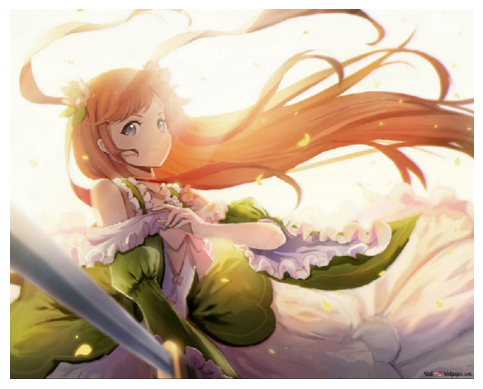

In [ ]:
# Пример использования функции для отображения изображения
display_image("1-1.jpg")

## Генерация текста на основе изображения

USER:  
Give me a list of what is located in the image MOST IMPORTANT things. In this format ["obj", "obj2", "obj3", "obj4", "obj5"] Maximum 5 obj
ASSISTANT: ["woman", "flowers", "sunlight", "hair", "dress"]


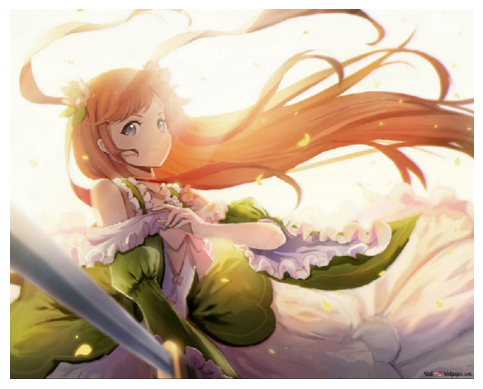

In [ ]:
# Максимальное количество новых токенов
max_new_tokens = 300

# Пример запроса к модели
prompt = 'USER: <image>\nGive me a list of what is located in the image MOST IMPORTANT things. In this format ["obj", "obj2", "obj3", "obj4", "obj5"] Maximum 5 obj\nASSISTANT:'
test = 'USER: <image>\nDescribe image\nASSISTANT:'

# Генерация текста на основе изображения с изменением температуры
outputs = pipe("1-1.jpg", prompt=prompt, generate_kwargs={"max_new_tokens": 300})

# Вывод сгенерированного текста ASSISTANT:
print(outputs[0]["generated_text"])
display_image("1-1.jpg")


Важно задавать модель с определенным форматом запроса

```bash
USER: <image>\n<prompt>\nASSISTANT:
```

Почему это важно:



*   **Контекст:** Модель понимает, какой текст является вводом пользователя, а какой — ответом ассистента, что помогает лучше контекстуализировать и генерировать релевантные ответы.
*   **Точность генерации:** Правильный формат запроса помогает модели идентифицировать начало и конец диалогов, что улучшает точность и последовательность ответов.
*   **Согласованность:** Единый формат запросов обеспечивает согласованность и упрощает интеграцию модели в различные приложения.




In [ ]:
# Иногда колаб ломается, это исправляет его.
import locale
locale.getpreferredencoding = lambda: "UTF-8"

## Создание сервера с помощью Gradio и подключение модели

### Установка библиотеки Gradio и Импорт необходимых модулей

In [ ]:
# Установка библиотеки Gradio, которая поможет создать связь между клиентом и сервером
%%capture
!pip install gradio==4.31.0

# Импорт необходимых модулей
import gradio as gr
from PIL import Image
import numpy as np
import os


### Функция обработки входных данных

In [ ]:
def process_input(image=None):
    """
    Обрабатывает загруженное изображение, сохраняет его и передает в модель LLaVA для анализа.

    Аргументы:
        image (ndarray): Изображение в формате numpy array.

    Возвращает:
        str: Список объектов, расположенных на изображении.
    """
    if image is not None:
        # Создание директории для сохранения изображений, если она не существует
        if not os.path.exists('images'):
            os.makedirs('images')

        # Преобразование изображения из numpy array в PIL Image
        image_pil = Image.fromarray(image.astype('uint8'), 'RGB')

        # Сохранение изображения с уникальным именем
        image_path = f"images/image_{len(os.listdir('images')) + 1}.png"
        image_pil.save(image_path)

        # Определение запроса для модели
        prompt = 'USER: <image>\nGive me a list of what is located in the image MOST IMPORTANT things without repeating only unique tags. In this format ["obj", "obj2", "obj3", "obj4", "obj5"] Maximum 5 obj without repeating. Good Examples: ["man", "sunglasses", "coffee", "watch", "suit"] or ["letter", "signature", "stamp", "seal", "certificate"] \nASSISTANT:'

        # Получение ответа от модели
        outputs = pipe(image_path, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

        return outputs[0]["generated_text"]

    return "No image provided."


### Создание интерфейса Gradio

In [ ]:
# Создание интерфейса Gradio
iface = gr.Interface(
    fn=process_input,  # Функция для обработки входных данных
    inputs=[gr.Image(label="Upload Image")],  # Входной элемент для загрузки изображения
    outputs="text",  # Выходной элемент для отображения текста
    title="Описание изображений с LLaVA",
    description="Загрузите изображение, чтобы получить описание"
)

# Запуск интерфейса с возможностью шаринга и отладки
iface.launch(share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://fbcb1a0c4e38e75e85.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1123: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1123: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1123: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1123: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
